In [1]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset from CSV
data = pd.read_csv('../data/iris.csv')

In [4]:
# Ensure column names match expected format
data.columns = ['sepal_length', 'sepal_width',
                'petal_length', 'petal_width', 'species']

# Encode species if necessary (assuming the species are strings)
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [5]:
# Prepare the data
X = data.iloc[:, :-1]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
# Console-based app
print("Iris Species Prediction")

# Display dataset
print("\n### Iris Sample Dataset")
print(data.head())

Iris Species Prediction

### Iris Sample Dataset
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [8]:
# Model selection
print("\nChoose a model:")
print("1. K-Nearest Neighbors")
print("2. Decision Tree")
print("3. Random Forest")
print("4. Linear Regression")

model_choice = input("\nEnter the number corresponding to your choice (1, 2, 3, 4): ")

# Model training and prediction
if model_choice == "1":
    model_name = "K-Nearest Neighbors"
    model = KNeighborsClassifier(n_neighbors=3)
    explanation = "K-Nearest Neighbors (KNN) classifies data points based on the majority class of their nearest neighbors."
elif model_choice == "2":
    model_name = "Decision Tree"
    model = DecisionTreeClassifier(random_state=42)
    explanation = "Decision Tree is a model that splits the data into branches to make predictions based on the values of input features."
elif model_choice == "3":
    model_name = "Random Forest"
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    explanation = "Random Forest is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction."
elif model_choice == "4":
    model_name = "Linear Regression"
    model = LinearRegression()
    explanation = "Linear Regression predicts the target variable as a linear combination of the input features. Although typically used for continuous targets, here we use it for classification."
else:
    print("Invalid choice. Please enter a number between 1 and 4.")
    exit()
    
print("\n### Model Explanation")
print(explanation)

# Train
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# If using Linear Regression, round the predictions and convert to integer type
if model_name == "Linear Regression":
    y_pred = y_pred.round().astype(int)


Choose a model:
1. K-Nearest Neighbors
2. Decision Tree
3. Random Forest
4. Linear Regression

### Model Explanation
K-Nearest Neighbors (KNN) classifies data points based on the majority class of their nearest neighbors.


In [11]:
# Model evaluation
print(f"\n### {model_name} Model Evaluation")
if model_name == "Linear Regression":
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
else:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")


### K-Nearest Neighbors Model Evaluation
Accuracy: 100.00%



### Data Visualization (K-Nearest Neighbors)


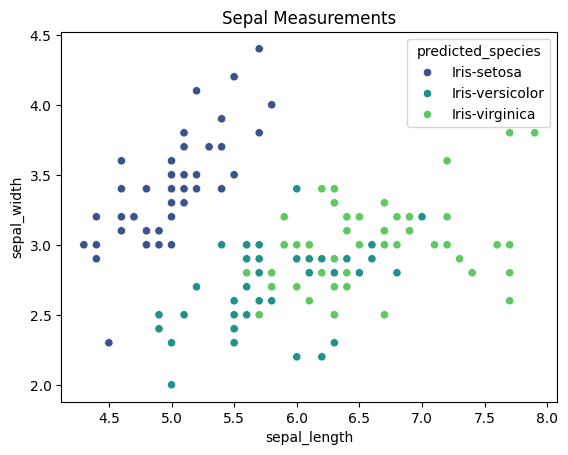

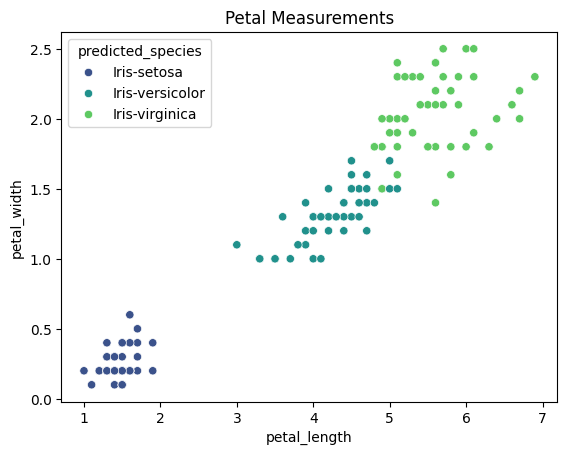

In [12]:
# Data visualization based on predictions
if model_name == "Linear Regression":
    print("\n### Data Visualization (Linear Regression)")
    print("Linear Regression does not produce categorical predictions, hence no categorical scatter plots are available.")

    # Scatter plot of predicted vs true values
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, color='blue')
    ax.plot([y_test.min(), y_test.max()], [
            y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title('True vs Predicted Values (Linear Regression)')
    plt.show()
else:
    print(f"\n### Data Visualization ({model_name})")
    # Add predictions to the dataset for visualization
    data['predicted_species'] = le.inverse_transform(model.predict(X))

    # Scatter plot based on sepal measurements
    fig_sepal, ax_sepal = plt.subplots()
    sns.scatterplot(data=data, x='sepal_length', y='sepal_width',
                    hue='predicted_species', palette='viridis', ax=ax_sepal)
    ax_sepal.set_title('Sepal Measurements')
    plt.show()

    # Scatter plot based on petal measurements
    fig_petal, ax_petal = plt.subplots()
    sns.scatterplot(data=data, x='petal_length', y='petal_width',
                    hue='predicted_species', palette='viridis', ax=ax_petal)
    ax_petal.set_title('Petal Measurements')
    plt.show()

In [13]:
# User input for predictions
print("\n### Predict Iris Species")
sepal_length = float(input(f"Sepal Length ({X['sepal_length'].min()} - {X['sepal_length'].max()}): "))
sepal_width = float(input(f"Sepal Width ({X['sepal_width'].min()} - {X['sepal_width'].max()}): "))
petal_length = float(input(f"Petal Length ({X['petal_length'].min()} - {X['petal_length'].max()}): "))
petal_width = float(input(f"Petal Width ({X['petal_width'].min()} - {X['petal_width'].max()}): "))

# Predict
prediction = model.predict(
    [[sepal_length, sepal_width, petal_length, petal_width]])
if model_name == "Linear Regression":
    prediction = prediction.round().astype(int)
predicted_species = le.inverse_transform(prediction)[0]
print(f">>>The predicted species is: {predicted_species}")


### Predict Iris Species
>>>The predicted species is: Iris-virginica


/home/thyler/testProjets/PY-ML/IRIS/iris_ml_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
